# Generate Reactions

This script performs the same task as the script in `scripts/generateReactions.py` but in visual ipynb format.
It can also evaluate the reaction forward and reverse rates at a user selected temperature.

In [1]:
from rmgpy.rmg.main import RMG
from rmgpy.rmg.model import CoreEdgeReactionModel
from rmgpy import settings
from IPython.display import display
from arkane.output import prettify

Declare database variables here by changing the thermo and reaction libraries, or restrict to certain reaction families.  

In [2]:
database = """
database(		
    thermoLibraries = ['BurkeH2O2','primaryThermoLibrary','DFT_QCI_thermo','CBS_QB3_1dHR','Narayanaswamy','Chernov'],		
    reactionLibraries = [],		
    seedMechanisms = [],		
    kineticsDepositories = ['training'],		
    kineticsFamilies = [
    'H_Abstraction',
    'R_Addition_MultipleBond',
    'intra_H_migration',
    'Intra_R_Add_Endocyclic',
    'Intra_R_Add_Exocyclic'
    ],
    kineticsEstimator = 'rate rules',		
)	

options(
    verboseComments=True,  # Set to True for detailed kinetics comments
)
"""

List all species you want reactions between

In [3]:
speciesList = """
species(		
    label='i1',
    reactive=True,		
    structure=adjacencyList(
        \"""
        multiplicity 2
        1 C u0 p0 c0 {3,S} {4,S} {10,S} {11,S}
        2 C u0 p0 c0 {4,S} {12,S} {13,S} {14,S}
        3 C u0 p0 c0 {1,S} {5,B} {6,B}
        4 C u1 p0 c0 {1,S} {2,S} {15,S}
        5 C u0 p0 c0 {3,B} {8,B} {19,S}
        6 C u0 p0 c0 {3,B} {9,B} {20,S}
        7 C u0 p0 c0 {8,B} {9,B} {17,S}
        8 C u0 p0 c0 {5,B} {7,B} {16,S}
        9 C u0 p0 c0 {6,B} {7,B} {18,S}
        10 H u0 p0 c0 {1,S}
        11 H u0 p0 c0 {1,S}
        12 H u0 p0 c0 {2,S}
        13 H u0 p0 c0 {2,S}
        14 H u0 p0 c0 {2,S}
        15 H u0 p0 c0 {4,S}
        16 H u0 p0 c0 {8,S}
        17 H u0 p0 c0 {7,S}
        18 H u0 p0 c0 {9,S}
        19 H u0 p0 c0 {5,S}
        20 H u0 p0 c0 {6,S}
        \"""
    )
)
"""

In [4]:
# Write input file to disk
inputFile = open('temp/input.py','w')
inputFile.write(database)
inputFile.write(speciesList)
inputFile.close()

In [5]:
# Execute generate reactions
from rmgpy.tools.generate_reactions import RMG, execute
kwargs = {
            'restart': False,
            'walltime': '00:00:00:00',
            'kineticsdatastore': True
    }
rmg = RMG(inputFile='temp/input.py', outputDirectory='temp')
rmg = execute(rmg, **kwargs)

In [6]:
# Pick some temperature to evaluate the forward and reverse kinetics
T = 623.0 # K

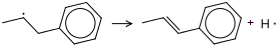

Reaction Family = R_Addition_MultipleBond

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: CC=Cc1ccccc1
SMILES: CC=Cc1ccccc1
Label: [H]
SMILES: [H]

! Template reaction: R_Addition_MultipleBond
! Flux pairs: i1(1), C9H10(2); i1(1), H(3); 
! Matched reaction 78 C9H11-11 <=> C9H10-7 + H in R_Addition_MultipleBond/training
i1(1)=C9H10(2)+H(3)                                 2.424e+10 0.914     34.551   


Heat of Reaction = 32.56 kcal/mol
Forward kinetics at 623.0 K: 6.58E+00
Reverse kinetics at 623.0 K: 2.17E+06


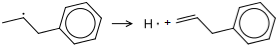

Reaction Family = R_Addition_MultipleBond

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: [H]
SMILES: [H]
Label: C=CCc1ccccc1
SMILES: C=CCc1ccccc1

! Template reaction: R_Addition_MultipleBond
! Flux pairs: i1(1), C9H10(4); i1(1), H(3); 
! Matched reaction 77 C9H11-10 <=> C9H10-6 + H in R_Addition_MultipleBond/training
! Ea raised from 146.0 to 147.6 kJ/mol to match endothermicity of reaction.
i1(1)=H(3)+C9H10(4)                                 4.935e+11 0.894     35.284   


Heat of Reaction = 37.43 kcal/mol
Forward kinetics at 623.0 K: 6.52E+01
Reverse kinetics at 623.0 K: 1.98E+10


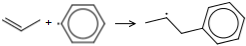

Reaction Family = R_Addition_MultipleBond

Reactants
Label: C=CC
SMILES: C=CC

Label: [c]1ccccc1
SMILES: [c]1ccccc1

Products
Label: i1
SMILES: C[CH]Cc1ccccc1

! Template reaction: R_Addition_MultipleBond
! Flux pairs: C3H6(5), i1(1); C6H5(6), i1(1); 
! Matched reaction 73 propene_1 + C6H5 <=> C9H11-6 in R_Addition_MultipleBond/training
C3H6(5)+C6H5(6)=i1(1)                               2.145e+02 3.050     0.830    


Heat of Reaction = -37.57 kcal/mol
Forward kinetics at 623.0 K: 3.66E+04
Reverse kinetics at 623.0 K: 3.03E-01


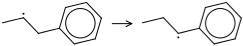

Reaction Family = intra_H_migration

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: CC[CH]c1ccccc1
SMILES: CC[CH]c1ccccc1

! Template reaction: intra_H_migration
! Flux pairs: i1(1), C9H11(7); 
! Matched reaction 36 C9H11-5 <=> C9H11-6 in intra_H_migration/training
! Kinetics were estimated in this direction instead of the reverse because:
! Both directions matched the same entry in intra_H_migration, but this direction is exergonic.
! dHrxn(298 K) = -52.51 kJ/mol, dGrxn(298 K) = -39.83 kJ/mol
i1(1)=C9H11(7)                                      1.148e+11 0.537     37.159   


Heat of Reaction = -11.65 kcal/mol
Forward kinetics at 623.0 K: 3.35E-01
Reverse kinetics at 623.0 K: 1.65E-03


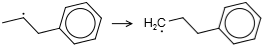

Reaction Family = intra_H_migration

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: [CH2]CCc1ccccc1
SMILES: [CH2]CCc1ccccc1

! Template reaction: intra_H_migration
! Flux pairs: i1(1), C9H11(8); 
! Matched reaction 35 C9H11-3 <=> C9H11-4 in intra_H_migration/training
! Kinetics were estimated in this direction instead of the reverse because:
! Both directions matched the same entry in intra_H_migration, but this direction is exergonic.
! dHrxn(298 K) = 11.09 kJ/mol, dGrxn(298 K) = 13.22 kJ/mol
i1(1)=C9H11(8)                                      1.312e+11 0.608     39.998   


Heat of Reaction = 3.09 kcal/mol
Forward kinetics at 623.0 K: 6.11E-02
Reverse kinetics at 623.0 K: 1.07E+00


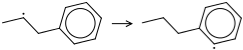

Reaction Family = intra_H_migration

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: CCCc1[c]cccc1
SMILES: CCCc1[c]cccc1

! Template reaction: intra_H_migration
! Flux pairs: i1(1), C9H11(9); 
! Matched reaction 37 C9H11-7 <=> C9H11-8 in intra_H_migration/training
! Kinetics were estimated in this direction instead of the reverse because:
! Both directions matched the same entry in intra_H_migration, but this direction is exergonic.
! dHrxn(298 K) = 60.88 kJ/mol, dGrxn(298 K) = 65.43 kJ/mol
i1(1)=C9H11(9)                                      3.481e-03 4.357     21.411   


Heat of Reaction = 15.01 kcal/mol
Forward kinetics at 623.0 K: 1.61E+02
Reverse kinetics at 623.0 K: 1.10E+08


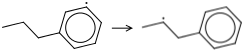

Reaction Family = intra_H_migration

Reactants
Label: CCCc1c[c]ccc1
SMILES: CCCc1c[c]ccc1

Products
Label: i1
SMILES: C[CH]Cc1ccccc1

! Template reaction: intra_H_migration
! Flux pairs: C9H11(10), i1(1); 
! Average of [Average of [Average of [Average of [Average of [R5H_CCCC_O;O_rad_out;Cs_H_out_H/NonDeC] + Average of [Average of [Average of
! [R5H_SSSS_CsCsCsSCs;C_rad_out_H/NonDeC;Cs_H_out_H/NonDeC]]] + Average of [Average of [R5H_SSSS_OO(Cs/Cs)Cs;O_rad_out;Cs_H_out_H/NonDeC] +
! R5H_SSSS_OOCCC;O_rad_out;Cs_H_out_H/NonDeC] + Average of [R5H_CCCC_O;O_rad_out;Cs_H_out_H/NonDeC + R5H_SSSS_OOCCC;O_rad_out;Cs_H_out_H/NonDeC] +
! Average of [Average of [Average of [R5H_SSSS_CsCsCsSCs;C_rad_out_H/NonDeC;Cs_H_out_H/NonDeC]] + Average of [Average of
! [R5H_SSSS_CsCsCsSCs;C_rad_out_H/NonDeC;Cs_H_out_H/NonDeC] + Average of [R5H_SSSS_CsCsCsSCs;C_rad_out_H/NonDeC;Cs_H_out_H/NonDeC]]]] + Average of
! [Average of [R5H_CCCC_O;O_rad_out;Cs_H_out_H/NonDeC + R5H_SSSS_OOCCC;O_rad_out;Cs_H_out_H/NonDeC]]

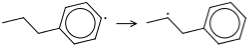

Reaction Family = intra_H_migration

Reactants
Label: CCCc1cc[c]cc1
SMILES: CCCc1cc[c]cc1

Products
Label: i1
SMILES: C[CH]Cc1ccccc1

! Template reaction: intra_H_migration
! Flux pairs: C9H11(11), i1(1); 
! Average of [Average of [Average of [Average of [Average of [R6H_SSSSS_OO;O_rad_out;Cs_H_out_H/NonDeC] + Average of
! [R6H_SSSSS_OO;O_rad_out;Cs_H_out_H/NonDeC]] + Average of [Average of [R6H_SSSSS_OO;O_rad_out;Cs_H_out_H/NonDeC]]] + Average of [Average of [Average of
! [R6H_SSSSS_OO;O_rad_out;Cs_H_out_H/NonDeC]]]] + Average of [Average of [Average of [Average of [R6H_SSSSS_OO;O_rad_out;Cs_H_out_H/NonDeC]]]]]
! Estimated using template [R6H;Y_rad_out;Cs_H_out_H/NonDeC] for rate rule [R6H;Cb_rad_out;Cs_H_out_H/NonDeC]
! Multiplied by reaction path degeneracy 4
! Kinetics were estimated in this direction instead of the reverse because:
! Both directions are estimates, but this direction is exergonic.
! dHrxn(298 K) = -60.88 kJ/mol, dGrxn(298 K) = -65.43 kJ/mol
C9H11(11)=i1(1)         

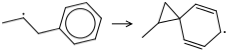

Reaction Family = Intra_R_Add_Exocyclic

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: CC1CC12[CH]C=CC=C2
SMILES: CC1CC12C=C[CH]C=C2

! Template reaction: Intra_R_Add_Exocyclic
! Flux pairs: i1(1), C9H11(12); 
! Average of [Average of [R4_S_D;doublebond_intra_2H_secDe;radadd_intra_csHNd from training reaction 2]]
! Estimated using template [R4_S_D;doublebond_intra;radadd_intra_csHNd] for rate rule [R4_S_D;doublebond_intra_HDe_secDe;radadd_intra_csHNd]
i1(1)=C9H11(12)                                     4.077e+14 -0.538    21.630   


Heat of Reaction = 17.17 kcal/mol
Forward kinetics at 623.0 K: 3.32E+05
Reverse kinetics at 623.0 K: 5.19E+15


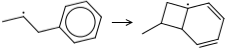

Reaction Family = Intra_R_Add_Exocyclic

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: CC1CC2=CC=C[CH]C21
SMILES: CC1C[C]2C=CC=CC21

! Template reaction: Intra_R_Add_Exocyclic
! Flux pairs: i1(1), C9H11(13); 
! Exact match found for rate rule [R5_SS_D;doublebond_intra_HCd_pri;radadd_intra_csHNd]
! Ea raised from 115.8 to 118.1 kJ/mol to match endothermicity of reaction.
i1(1)=C9H11(13)                                     6.190e+11 0.210     28.232   


Heat of Reaction = 27.41 kcal/mol
Forward kinetics at 623.0 K: 2.98E+02
Reverse kinetics at 623.0 K: 3.56E+16


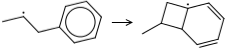

Reaction Family = Intra_R_Add_Endocyclic

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: CC1CC2=CC=C[CH]C21
SMILES: CC1C[C]2C=CC=CC21

! Template reaction: Intra_R_Add_Endocyclic
! Flux pairs: i1(1), C9H11(13); 
! Estimated using template [R4_S_D;doublebond_intra_secDe_HCd;radadd_intra_csHNd] for rate rule
! [R4_Cs_HH_D;doublebond_intra_secDe_HCd;radadd_intra_csHNd]
! Multiplied by reaction path degeneracy 2
i1(1)=C9H11(13)                                     1.280e+12 0.190     30.200   


Heat of Reaction = 27.41 kcal/mol
Forward kinetics at 623.0 K: 1.11E+02
Reverse kinetics at 623.0 K: 1.32E+16


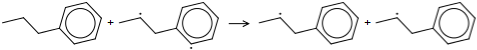

Reaction Family = H_Abstraction

Reactants
Label: CCCc1ccccc1
SMILES: CCCc1ccccc1

Label: C[CH]Cc1[c]cccc1
SMILES: C[CH]Cc1[c]cccc1

Products
Label: i1
SMILES: C[CH]Cc1ccccc1
Label: i1
SMILES: C[CH]Cc1ccccc1

! Template reaction: H_Abstraction
! Flux pairs: C9H10(15), i1(1); C9H12(14), i1(1); 
! Exact match found for rate rule [C/H2/NonDeC;Cb_rad]
! Multiplied by reaction path degeneracy 2
! Kinetics were estimated in this direction instead of the reverse because:
! Both directions matched explicit rate rules, but this direction is exergonic.
! dHrxn(298 K) = -60.88 kJ/mol, dGrxn(298 K) = -65.43 kJ/mol
C9H12(14)+C9H10(15)=i1(1)+i1(1)                     2.200e-02 4.340     -1.300   


Heat of Reaction = -15.01 kcal/mol
Forward kinetics at 623.0 K: 8.44E+04
Reverse kinetics at 623.0 K: 1.24E-01


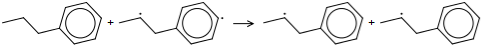

Reaction Family = H_Abstraction

Reactants
Label: CCCc1ccccc1
SMILES: CCCc1ccccc1

Label: C[CH]Cc1cc[c]cc1
SMILES: C[CH]Cc1cc[c]cc1

Products
Label: i1
SMILES: C[CH]Cc1ccccc1
Label: i1
SMILES: C[CH]Cc1ccccc1

! Template reaction: H_Abstraction
! Flux pairs: C9H10(16), i1(1); C9H12(14), i1(1); 
! Exact match found for rate rule [C/H2/NonDeC;Cb_rad]
! Multiplied by reaction path degeneracy 2
! Kinetics were estimated in this direction instead of the reverse because:
! Both directions matched explicit rate rules, but this direction is exergonic.
! dHrxn(298 K) = -60.88 kJ/mol, dGrxn(298 K) = -65.43 kJ/mol
C9H12(14)+C9H10(16)=i1(1)+i1(1)                     2.200e-02 4.340     -1.300   


Heat of Reaction = -15.01 kcal/mol
Forward kinetics at 623.0 K: 8.44E+04
Reverse kinetics at 623.0 K: 1.24E-01


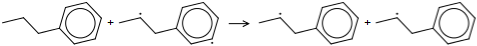

Reaction Family = H_Abstraction

Reactants
Label: CCCc1ccccc1
SMILES: CCCc1ccccc1

Label: C[CH]Cc1c[c]ccc1
SMILES: C[CH]Cc1c[c]ccc1

Products
Label: i1
SMILES: C[CH]Cc1ccccc1
Label: i1
SMILES: C[CH]Cc1ccccc1

! Template reaction: H_Abstraction
! Flux pairs: C9H10(17), i1(1); C9H12(14), i1(1); 
! Exact match found for rate rule [C/H2/NonDeC;Cb_rad]
! Multiplied by reaction path degeneracy 2
! Kinetics were estimated in this direction instead of the reverse because:
! Both directions matched explicit rate rules, but this direction is exergonic.
! dHrxn(298 K) = -60.88 kJ/mol, dGrxn(298 K) = -65.43 kJ/mol
C9H12(14)+C9H10(17)=i1(1)+i1(1)                     2.200e-02 4.340     -1.300   


Heat of Reaction = -15.01 kcal/mol
Forward kinetics at 623.0 K: 8.44E+04
Reverse kinetics at 623.0 K: 1.24E-01


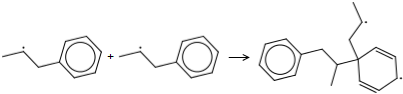

Reaction Family = R_Addition_MultipleBond

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: C[CH]CC1([CH]C=CC=C1)C(C)Cc1ccccc1
SMILES: C[CH]CC1(C=C[CH]C=C1)C(C)Cc1ccccc1

! Template reaction: R_Addition_MultipleBond
! Flux pairs: i1(1), C18H22(18); i1(1), C18H22(18); 
! Average of [Average of [Average of [Cb-H_Cb-H;CsJ-HHH from training reaction 17] + Average of [Cb-H_Cb-H;CsJ-HHH from training reaction 17]] + Average
! of [Average of [Cb-H_Cb-H;CsJ-HHH from training reaction 17]]]
! Estimated using template [Cb_Cb;CsJ] for rate rule [Cb-R!H_Cb-H;CsJ-CsCsH]
i1(1)+i1(1)=C18H22(18)                              3.750e+02 2.687     10.019   


Heat of Reaction = -7.80 kcal/mol
Forward kinetics at 623.0 K: 3.70E+00
Reverse kinetics at 623.0 K: 8.06E+08


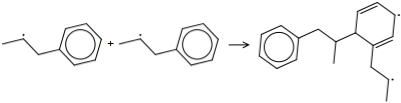

Reaction Family = R_Addition_MultipleBond

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: C[CH]C[C]1C=CC=CC1C(C)Cc1ccccc1
SMILES: C[CH]CC1=C[CH]C=CC1C(C)Cc1ccccc1

! Template reaction: R_Addition_MultipleBond
! Flux pairs: i1(1), C18H22(19); i1(1), C18H22(19); 
! Average of [Average of [Cb-H_Cb-H;CsJ-HHH from training reaction 17] + Average of [Cb-H_Cb-H;CsJ-HHH from training reaction 17]]
! Estimated using template [Cb-H_Cb;CsJ] for rate rule [Cb-H_Cb-R!H;CsJ-CsCsH]
! Multiplied by reaction path degeneracy 2
i1(1)+i1(1)=C18H22(19)                              7.500e+02 2.687     10.019   


Heat of Reaction = -8.72 kcal/mol
Forward kinetics at 623.0 K: 7.39E+00
Reverse kinetics at 623.0 K: 3.92E+08


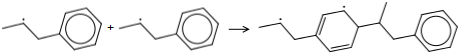

Reaction Family = R_Addition_MultipleBond

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: C[CH]CC1C=CC([CH]C=1)C(C)Cc1ccccc1
SMILES: C[CH]CC1C=CC([CH]C=1)C(C)Cc1ccccc1

! Template reaction: R_Addition_MultipleBond
! Flux pairs: i1(1), C18H22(20); i1(1), C18H22(20); 
! Average of [Cb-H_Cb-H;CsJ-HHH from training reaction 17]
! Estimated using template [Cb-H_Cb-H;CsJ] for rate rule [Cb-H_Cb-H;CsJ-CsCsH]
i1(1)+i1(1)=C18H22(20)                              3.750e+02 2.687     10.019   


Heat of Reaction = -0.16 kcal/mol
Forward kinetics at 623.0 K: 3.70E+00
Reverse kinetics at 623.0 K: 1.57E+12


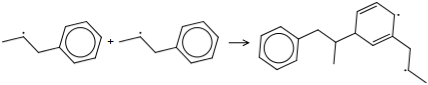

Reaction Family = R_Addition_MultipleBond

Reactants
Label: i1
SMILES: C[CH]Cc1ccccc1

Label: i1
SMILES: C[CH]Cc1ccccc1

Products
Label: C[CH]CC1C=C[CH]C(C=1)C(C)Cc1ccccc1
SMILES: C[CH]CC1[CH]C=CC(C=1)C(C)Cc1ccccc1

! Template reaction: R_Addition_MultipleBond
! Flux pairs: i1(1), C18H22(21); i1(1), C18H22(21); 
! Average of [Cb-H_Cb-H;CsJ-HHH from training reaction 17]
! Estimated using template [Cb-H_Cb-H;CsJ] for rate rule [Cb-H_Cb-H;CsJ-CsCsH]
! Multiplied by reaction path degeneracy 2
i1(1)+i1(1)=C18H22(21)                              7.500e+02 2.687     10.019   


Heat of Reaction = -8.72 kcal/mol
Forward kinetics at 623.0 K: 7.39E+00
Reverse kinetics at 623.0 K: 3.92E+08


In [7]:
for rxn in rmg.reactionModel.outputReactionList:
    print '========================='
    display(rxn)
    print 'Reaction Family = {0}'.format(rxn.family)
    print ''
    print 'Reactants'
    for reactant in rxn.reactants:
        print 'Label: {0}'.format(reactant.label)
        print 'SMILES: {0}'.format(reactant.molecule[0].toSMILES())
        print ''
    print 'Products'
    for product in rxn.products:
        print 'Label: {0}'.format(product.label)
        print 'SMILES: {0}'.format(product.molecule[0].toSMILES())
    print ''
    print rxn.toChemkin()
    print ''
    print 'Heat of Reaction = {0:.2F} kcal/mol'.format(rxn.getEnthalpyOfReaction(623.0)/4184)
    print 'Forward kinetics at {0} K: {1:.2E}'.format(T, rxn.getRateCoefficient(T))

    reverseRate = rxn.generateReverseRateCoefficient()
    print 'Reverse kinetics at {0} K: {1:.2E}'.format(T, reverseRate.getRateCoefficient(T))